## Assignment 1

Let us begin by importing pandas.

In [1]:
import pandas as pd

Next let us import three tables and assign names to each column.

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('D:/NEU/DM/ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('D:/NEU/DM/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('D:/NEU/DM/ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

Let us look at the first 5 rows of user table:

In [3]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Let us look at the first 5 rows of ratings table:

In [4]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Let us look at the first 5 rows of movies table:

In [5]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Let us merge ratings with users using pandas's merge function, then we merge that result with the movies data.

In [7]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


### Question 1: An aggregate of the movie ratings for each particular genre.

In [8]:
genres_ratings=data.pivot_table('rating',index='genres',aggfunc='mean')

In [9]:
genres_ratings[:5]

,rating
genres,
Action,3.354886
Action|Adventure,3.676814
Action|Adventure|Animation,4.147826
Action|Adventure|Animation|Children's|Fantasy,2.703704
Action|Adventure|Animation|Horror|Sci-Fi,3.546926


### Question 2: The top 5 highest ranked genre by women.

In [10]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [11]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:5]

gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000


### Question 3: The top 5 highest ranked genre by men.

In [12]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:5]

gender,F,M
title,,
Schlafes Bruder (Brother of Sleep) (1995),NaN,5.0
Small Wonders (1996),3.333333,5.0
"Gate of Heavenly Peace, The (1995)",5.000000,5.0
"Baby, The (1973)",NaN,5.0
Ulysses (Ulisse) (1954),NaN,5.0


### Question 4: A breakdown of a movie’s ratings by age, use any movie of your choice.
Movie used: 'Toy Story'

In [13]:
age_ratings=data.pivot_table('rating',index='title',columns='age')
age_ratings.query('title==["Toy Story (1995)"]')

age,1,18,25,35,45,50,56
title,,,,,,,
Toy Story (1995),3.919643,4.017857,4.201266,4.3026,4.104895,4.092593,3.886792


### Question 5: A function that given a user_id and movie_id , returns a list of user_ids for other users that rated the movie identified by the provided movie_id with the same score.

In [14]:
def similarRating(user_id,movie_id):
    rating=ratings[(ratings['user_id']==user_id)&(ratings['movie_id']==movie_id)]['rating'].values[0]
    userList=list(ratings[(ratings['movie_id']==movie_id)&(ratings['rating']==rating)]['user_id'])
    userList.remove(user_id)
    return userList

print(similarRating(1,914))

[35L, 48L, 302L, 324L, 329L, 333L, 439L, 528L, 549L, 731L, 804L, 864L, 881L, 925L, 975L, 1017L, 1019L, 1024L, 1073L, 1083L, 1125L, 1150L, 1181L, 1182L, 1279L, 1354L, 1473L, 1540L, 1580L, 1592L, 1605L, 1671L, 1680L, 1693L, 1875L, 1887L, 1899L, 2011L, 2068L, 2172L, 2181L, 2231L, 2258L, 2285L, 2297L, 2304L, 2484L, 2550L, 2555L, 2621L, 2679L, 2807L, 2848L, 2907L, 2985L, 3026L, 3108L, 3410L, 3486L, 3503L, 3521L, 3569L, 3576L, 3635L, 3649L, 3792L, 3823L, 3971L, 3982L, 4190L, 4227L, 4253L, 4318L, 4322L, 4369L, 4591L, 4594L, 4704L, 4738L, 4831L, 4883L, 4942L, 4946L, 4948L, 4980L, 5060L, 5113L, 5271L, 5279L, 5305L, 5448L, 5574L, 5614L, 5805L, 5811L, 5824L, 5838L, 5858L, 5880L, 5888L, 5954L, 5990L, 5993L, 6036L]


### Question 6: Some other statistic, figure, data aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it

Let us plot a graph of top 10 highest ranked genres among women.

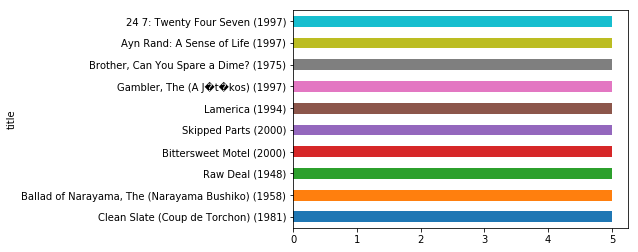

In [18]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[0:10]['F'].plot(kind='barh')

We can see that each female likes different movies, but each movie is liked equally.